# Telecom Churn Group Case Study #

## Problem Statement ##

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Hence, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

### 1.Importing important libaries and reading datasets ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Sandesh\Desktop\Upgard 1\Machine Learning\Adv ML Assignment_Telecom Usage Churn\telecom_churn_data_1.csv")

In [3]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [4]:
# To avail a generic idea of the dataframes #
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# To avail the number of rows and columns
df.shape

(99999, 226)

In [6]:
Cols = df.columns
list(Cols)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

### 2. Classifying dataframe in Continous and Categorical Columns ###

In [8]:
# Checking dataframe  for Categorical Columns"
category_columns = df.select_dtypes("object").columns
category_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
# Checking dataframe  for Continous Columns"
continous_columns = df.select_dtypes("number").columns
list(continous_columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

### 3. Identifying Missing Values - Columnwise ###

In [10]:
# Checking the percentage of missing values in Columns
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [11]:
colmns_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)>0

missing_values_columns = colmns_missing_data[colmns_missing_data > 0].index

print('Number of columns with Missing values  = ', len(missing_values_columns))
print('Dataframe Shape: ', df.shape)

Number of columns with Missing values  =  166
Dataframe Shape:  (99999, 226)


In [12]:
df1 = df.copy()

In [13]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df1.loc[df1.total_rech_data_6.isnull() & df1.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

total_rech_data_6 date_of_last_rech_data_6
1                 nan                      NaN
2                 nan                      NaN
3                 nan                      NaN
5                 nan                      NaN
6                 nan                      NaN
7                 nan                      NaN
8                 nan                      NaN
9                 nan                      NaN
10                nan                      NaN
11                nan                      NaN
12                nan                      NaN
13                nan                      NaN
14                nan                      NaN
15                nan                      NaN
16                nan                      NaN
17                nan                      NaN
18                nan                      NaN
20                nan                      NaN
21                nan                      NaN
22                nan                      NaN


Columns used for filtering high-value customers, can't be dropped
* total_rech_data_6 
* total_rech_data_7 
* av_rech_amt_data_6 
* av_rech_amt_data_7 

All these columns has more than 70% missing values

In [14]:
print(df1.total_rech_data_6.describe()); print_ln()
print(df1.total_rech_data_7.describe()); print_ln()
print(df1.av_rech_amt_data_6.describe()); print_ln()
print(df1.av_rech_amt_data_7.describe()); print_ln()

count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
-------------------------------------------------------------------------------- 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
---------------------------------------------

In [15]:
# Variables are numeric and distribution resemble the 'power law'. 
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

df1.total_rech_data_6.fillna(value=0, inplace=True)
df1.total_rech_data_7.fillna(value=0, inplace=True)
df1.total_rech_data_8.fillna(value=0, inplace=True)
df1.total_rech_data_9.fillna(value=0, inplace=True)

df1.av_rech_amt_data_6.fillna(value=0, inplace=True)
df1.av_rech_amt_data_7.fillna(value=0, inplace=True)
df1.av_rech_amt_data_8.fillna(value=0, inplace=True)
df1.av_rech_amt_data_9.fillna(value=0, inplace=True)

### 4. Identifying Missiing Values - Row Wise

In [16]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  df1.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [17]:
# sum of misisng values in each row
rows_missing_data = df1.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

missing_values_rows = rows_missing_data[rows_missing_data > 0]

print('Number of rows with Missing values  = ', len(missing_values_rows))
print('Dataframe Shape: ', df1.shape)

Number of rows with Missing values  =  87631
Dataframe Shape:  (99999, 226)


#### Looks like there are no rows with all values as Zero.

In [18]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(df1.isnull().sum()/len(df1.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8                  73.66
arpu_2g_9                  74.08
night_pck_user_6           74.85
night_pck_user_7           74.43
night_pck_user_8           73.66
night_pck_user_9           74.08
fb_user_6                  74.85
fb_user_7                  74.43
fb_user_8 

In [19]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
df1.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', df1.shape)

Number of columns droped here  =  32
Dataframe Shape:  (99999, 194)


### 5. Identifying missing values in Total number of recharges and Total amount of recharge

In [20]:
df1['total_no_of_rech'] = df1.total_rech_num_6 + df1.total_rech_num_7
df1['total_no_of_rech']

0          7
1         13
2          9
3         21
4         11
5          4
6         25
7         10
8         40
9          6
10         2
11         7
12         5
13        10
14        14
15        14
16        16
17        21
18         5
19         5
20         8
21        48
22         5
23         8
24        10
25        12
26         6
27         5
28         7
29        10
30         7
31        32
32         9
33        21
34         5
35         5
36         6
37         8
38        49
39         4
40         6
41         8
42         6
43         8
44        11
45        17
46        12
47         5
48        18
49         5
50         5
51         3
52         3
53        50
54         8
55         8
56        37
57        16
58        25
59        12
60        17
61        26
62         7
63         8
64         4
65        12
66        13
67         7
68         1
69        24
70         8
71         5
72         6
73        60
74        16
75        12
76         2

In [21]:
df1['total_amt_of_rech'] = df1.total_rech_amt_6 + df1.total_rech_amt_7
df1['total_amt_of_rech']

0          614
1          458
2          483
3          540
4          546
5          120
6          721
7         2370
8         1038
9          415
10           0
11         366
12         220
13         760
14         100
15         686
16         918
17         816
18          90
19         448
20         687
21        1280
22         285
23         454
24         770
25         622
26         154
27          60
28         193
29         196
30         172
31         611
32          94
33        3864
34         441
35         401
36         250
37          50
38        1056
39         308
40         252
41        1006
42         322
43         420
44         488
45         250
46         322
47         410
48        2897
49         132
50         308
51         565
52         198
53        2531
54         336
55         101
56         908
57        2294
58         350
59         590
60         930
61        1146
62         313
63         329
64         407
65         316
66        

In [22]:
df1.loc[df1.total_rech_amt_6.isnull()]["total_rech_amt_6"].sum()
df1.loc[df1.total_rech_amt_7.isnull()]["total_rech_amt_7"].sum()

0

In [23]:
# Identifying missing values in Total number of recharges and Total amount of recharge
df1.loc[df1.total_no_of_rech.isnull() & df1.total_amt_of_rech.isnull(), ["total_no_of_rech", "total_amt_of_rech"]].sum()

total_no_of_rech     0
total_amt_of_rech    0
dtype: int64

### 6. Treatment of missing values

In [24]:
# Column analysis % of missing values
print(round(100*(df1.isnull().sum()/len(df1.index)), 2)); print_ln()

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
last_date_of_month_6   0.00
last_date_of_month_7   0.60
last_date_of_month_8   1.10
last_date_of_month_9   1.66
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8    

### 6.1 Imputing Numerical Variables

In [25]:
# # replace missing values with '-1' in categorical columns
df1.fillna(df1.select_dtypes(include='object').mode().iloc[0], inplace=True)

### 6.2 Imputing Numerical Variables

In [26]:
df1.select_dtypes(include='number').describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

In [27]:
df1.fillna(df1.select_dtypes(include='number').median().iloc[0], inplace=True)

In [28]:
# Column analysis % of missing values
print(round(100*(df1.isnull().sum()/len(df1.index)), 2)); print_ln()

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
last_date_of_month_6   0.00
last_date_of_month_7   0.00
last_date_of_month_8   0.00
last_date_of_month_9   0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2t_mou_9       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8    

In [29]:
df1.shape

(99999, 196)

### 7. Filter High-Value Customers

In [30]:
df2 = df1.copy()

In [31]:
# New DERIVED Columns for Total Data Recharge Amount

df2["total_rech_data_amt_6"] = df2["total_rech_data_6"]*df1['av_rech_amt_data_6']
df2["total_rech_data_amt_7"] = df2["total_rech_data_7"]*df1['av_rech_amt_data_7']
df2["total_rech_data_amt_8"] = df2["total_rech_data_8"]*df1['av_rech_amt_data_8']
df2["total_rech_data_amt_9"] = df2["total_rech_data_9"]*df1['av_rech_amt_data_9']

In [32]:
# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df2.drop(drop_data_columns, axis=1, inplace=True)

In [33]:
# Filter high-value customers
avg_rech_amt_6_7 = (df2["total_rech_amt_6"] + df2["total_rech_data_amt_6"] + 
                      df2["total_rech_amt_7"] + df2["total_rech_data_amt_7"]) / 2.0
amount_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)

print('70 percentile of first two months avg recharge amount: ', amount_70_pc)

df2 = df2[avg_rech_amt_6_7 >= amount_70_pc]
print('Dataframe Shape: ', df2.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 192)


### Identify Curn & Tag Churners

In [34]:
df3 = df2.copy()

In [35]:
# Identify Churn
X = df3["total_ic_mou_9"] + df3["total_og_mou_9"] + df3["vol_2g_mb_9"] + df3["vol_3g_mb_9"]
df3["churn"] = np.where(X, 0, 1)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(df3) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
df3.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns dropped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', df3.shape); print_ln();

Number of columns dropped here  =  46
Dataframe Shape:  (30001, 147)
-------------------------------------------------------------------------------- 



### Identify columns that have no varience & Drop

In [36]:
# Identify columns that have no varience
unique_count = df3.nunique().sort_values(ascending=False)

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
unique_count_is_zero = unique_count[unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", unique_count_is_zero); print_ln();
drop_no_varience_columns = list(unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
unique_count_is_one = unique_count[unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", unique_count_is_one); print_ln();
drop_no_varience_columns += list(unique_count_is_one.index)

df3.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', df3.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', df3.shape); print_ln();

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
circle_id               1
dtype: int64
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30001, 143)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  4
Dataframe Shape:  (30001, 143)
-------------------------------------------------------------------------------- 



### Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [37]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
df3[date_vars].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0            6/21/2014           7/16/2014            8/8/2014
7            6/27/2014           7/25/2014           8/26/2014
8            6/25/2014           7/31/2014           8/30/2014
21           6/30/2014           7/31/2014           8/31/2014
23           6/18/2014            7/7/2014           8/24/2014

In [38]:
# convert to datetime
for col in date_vars:
    df3[col] = pd.to_datetime(df3[col])

print(df3[date_vars].info())
df3[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  30001 non-null  datetime64[ns]
 1   date_of_last_rech_7  30001 non-null  datetime64[ns]
 2   date_of_last_rech_8  30001 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 937.5 KB
None


date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           2014-06-21          2014-07-16          2014-08-08
7           2014-06-27          2014-07-25          2014-08-26
8           2014-06-25          2014-07-31          2014-08-30
21          2014-06-30          2014-07-31          2014-08-31
23          2014-06-18          2014-07-07          2014-08-24

In [39]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

df3["rech_days_left_6"]      = (last_date_of_month_6 - df3.date_of_last_rech_6).astype('timedelta64[D]')
df3["rech_days_left_7"]      = (last_date_of_month_7 - df3.date_of_last_rech_7).astype('timedelta64[D]')
df3["rech_days_left_8"]      = (last_date_of_month_8 - df3.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
print(df3[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  30001 non-null  float64
 1   rech_days_left_7  30001 non-null  float64
 2   rech_days_left_8  30001 non-null  float64
dtypes: float64(3)
memory usage: 937.5 KB
None


In [40]:
# Drop all old date columns: add dates columns to drop_column list
df3.drop(date_vars, axis=1, inplace=True)

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', df3.shape)

Number of columns droped here  =  3
Dataframe Shape:  (30001, 143)


### Oulier Assessment
- Use data distribution to find outliers

In [41]:
# # Checking outliers at 25%,50%,75%,90%,95% and 99%
df3.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
count       30001.00        30001.00        30001.00        30001.00 30001.00   
mean   7001206159.56     52273918.79     52273918.79     52273918.79   558.49   
std        690878.42    602710501.01    602710501.01    602710501.01   460.64   
min    7000000074.00            0.00            0.00            0.00 -2258.71   
25%    7000609293.00            0.00            0.00            0.00   309.87   
50%    7001203434.00            0.00            0.00            0.00   481.69   
75%    7001803773.00            0.00            0.00            0.00   699.94   
90%    7002165290.00            0.00            0.00            0.00   994.10   
95%    7002285218.00            0.00            0.00            0.00  1240.96   
99%    7002385520.00            0.00            0.00            0.00  1985.12   
max    7002410905.00   7001204632.00   7001204632.00   7001204632.00 27731.09   

        arpu_7   arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count 30001.00 30001.00      30001.00      30001.00      30001.00   
mean    560.78   508.60  127184572.13  125317653.49  273971576.33   
std     479.78   501.96  935038296.82  928276289.15 1357619402.18   
min   -2014.05  -945.81          0.00          0.00          0.00   
25%     309.83   231.47         20.01         18.93         15.63   
50%     480.94   427.58         92.44         90.84         80.79   
75%     698.32   661.49        321.11        323.13        302.44   
90%     995.86   977.35        865.66        900.64        953.99   
95%    1261.27  1255.02       1402.61       1449.33       2115.11   
99%    1999.50  1986.62 7001204632.00 7001204632.00 7001204632.00   
max   35145.83 33543.62 7001204632.00 7001204632.00 7001204632.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean   127184685.03  125317763.77  273971677.30   127184327.45   125317398.31   
std    935038281.46  928276274.26 1357619381.81   935038330.10   928276323.60   
min            0.00          0.00          0.00           0.00           0.00   
25%           80.71         78.54         63.19           0.00           0.00   
50%          237.09        233.31        213.18           0.00           0.00   
75%          517.61        523.66        505.51           0.00           0.00   
90%         1004.89       1011.26       1063.94          39.88          23.13   
95%         1531.74       1540.83       2114.74         140.99          99.13   
99%   7001204632.00 7001204632.00 7001204632.00  7001204632.00  7001204632.00   
max   7001204632.00 7001204632.00 7001204632.00  7001204632.00  7001204632.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean    273971354.72   127184337.91   125317405.82   273971362.09   
std    1357619446.91   935038328.68   928276322.58  1357619445.42   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
90%            40.89          74.31          47.06          75.78   
95%           270.48         235.86         174.93         402.74   
99%    7001204632.00  7001204632.00  7001204632.00  7001204632.00   
max    7001204632.00  7001204632.00  7001204632.00  7001204632.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          30001.00          30001.00          30001.00          30001.00   
mean       127184395.82      125317471.34      273971420.30      127184474.58   
std        935038320.80      928276313.74     1357619433.67      935038310.09   
min                0.00              0.00              0.00              0.00  

* Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
* Hence there is no need to treat these outliers

## Part 2: Exploratory Data Analysis
1. Univariate 
2. Bivatiate Analysis
3. Check imbalance in data-set (dependent variable)

In [42]:
df4 = df3.copy()

In [43]:
df4.shape

(30001, 143)

In [44]:
df4.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  \
0      7000842753            0.00            0.00            0.00  197.38   
7      7000701601            0.00            0.00            0.00 1069.18   
8      7001524846            0.00            0.00            0.00  378.72   
21     7002124215            0.00            0.00            0.00  514.45   
23     7000887461            0.00            0.00            0.00   74.35   

    arpu_7  arpu_8   onnet_mou_6   onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.82  213.80 7001204632.00 7001204632.00         0.00 7001204632.00   
7  1349.85 3171.48         57.84         54.68        52.29        453.43   
8   492.22  137.36        413.69        351.03        35.08         94.66   
21  597.75  637.76        102.41        132.11        85.14        757.93   
23  193.90  366.97         48.96         50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  7001204632.00          0.00  7001204632.00  7001204632.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0   7001204632.00  7001204632.00           0.00     7001204632.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0      7001204632.00              0.00     7001204632.00     7001204632.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00     7001204632.00     7001204632.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0      7001204632.00     7001204632.00              0.00 7001204632.00   
7               0.00              0.00              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              0.00              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  7001204632.00          0.00     7001204632.00     7001204632.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00     7001204632.00     7001204632.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36            808.74            876.

### Dependent Variable: check data imbalance

In [45]:
#checking whether data is imbalanced or not
churn  = df4["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))
print_ln()

Total Churn Count     = 2441
Total Not-Churn Count = 27560
Churn Rate            = 8.14%
-------------------------------------------------------------------------------- 



OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [46]:
df_not_churn = df4[df4["churn"] == 0]
df_churn     = df4[df4["churn"] == 1]

In [47]:
#calculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.669738751814224
13.897582957804179
median:
9.0
11.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  7. 11. 17.]


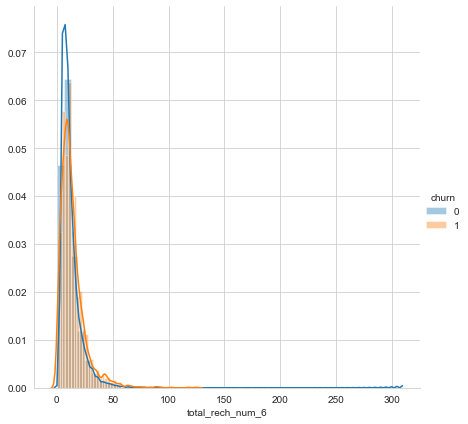

In [48]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [49]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.747496371552975
11.395329782875871
median:
9.0
9.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  5.  9. 15.]


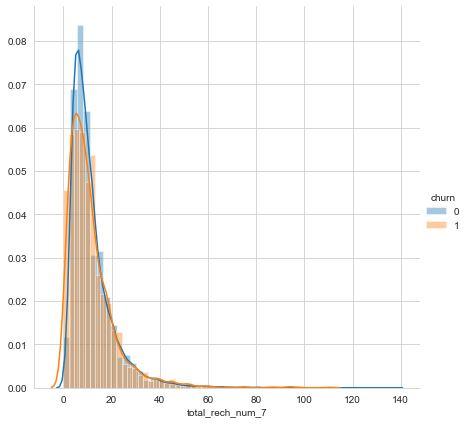

In [50]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [51]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.392126269956458
5.239246210569439
median:
8.0
3.0
Quantiles:
[ 0.  4.  8. 13.]
[0. 2. 3. 6.]


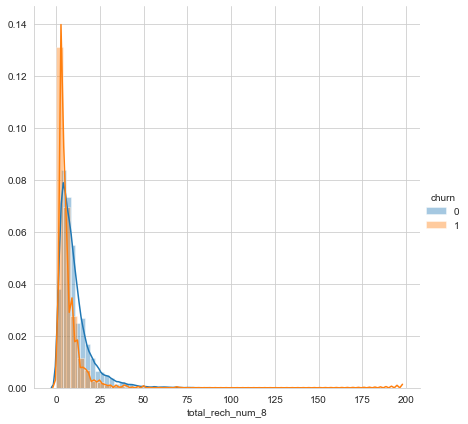

In [52]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

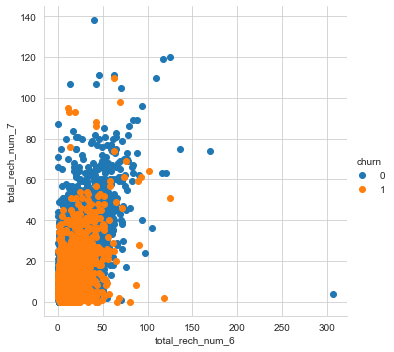

In [53]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

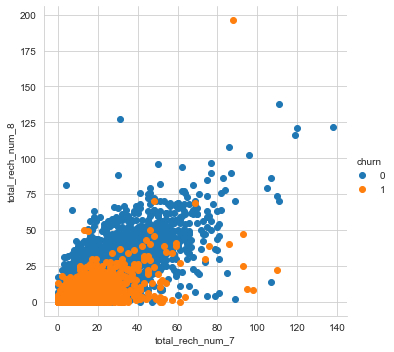

In [54]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

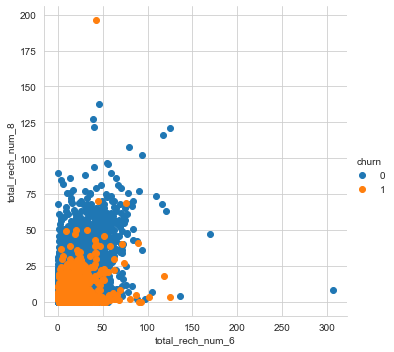

In [55]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [56]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
649.574709724238
786.7070872593199
median:
558.0
660.0
Quantiles:
[  0.   358.   558.   816.25]
[   0.  406.  660. 1002.]


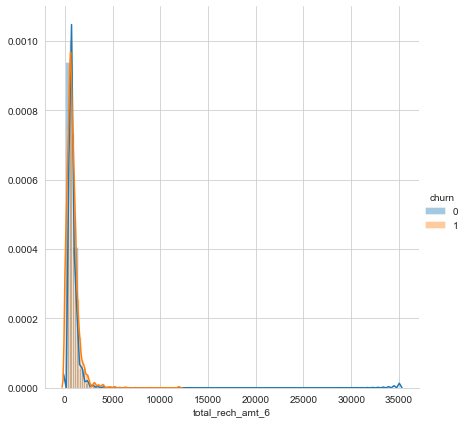

In [57]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [58]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
663.5278301886792
626.2900450634986
median:
565.0
526.0
Quantiles:
[  0. 360. 565. 830.]
[  0. 242. 526. 847.]


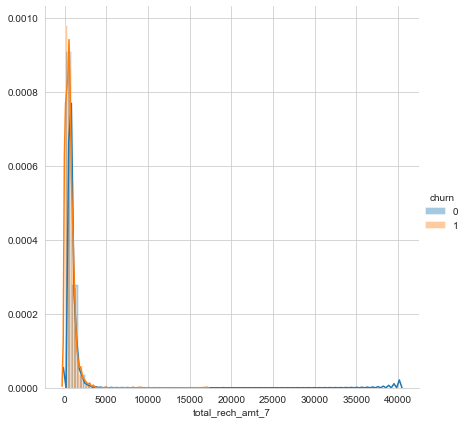

In [59]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [60]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
613.7010885341074
253.15280622695616
median:
510.0
45.0
Quantiles:
[  0. 280. 510. 797.]
[  0.   0.  45. 350.]


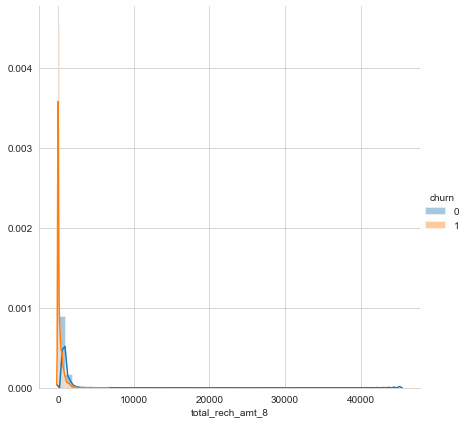

In [61]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

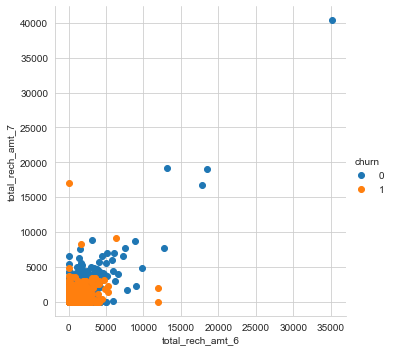

In [62]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

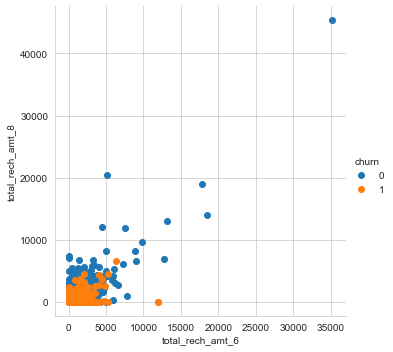

In [63]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

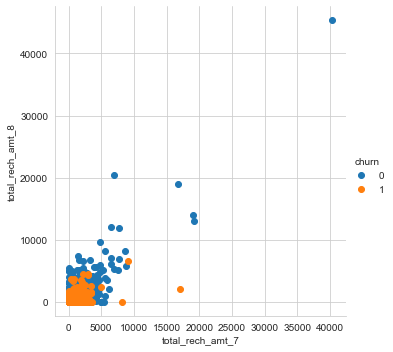

In [64]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [65]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
169.04945573294629
171.94223678820157
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0.  90. 110. 198.]


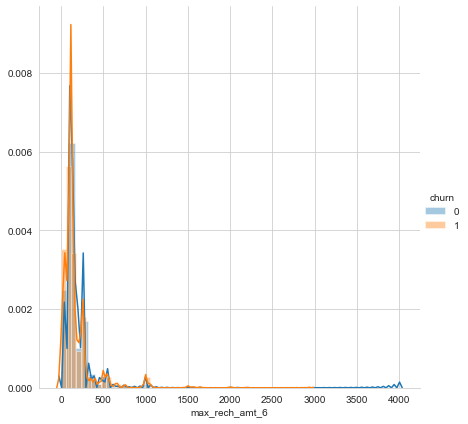

In [66]:
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

In [67]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
173.33657474600872
159.38877509217534
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  50. 110. 154.]


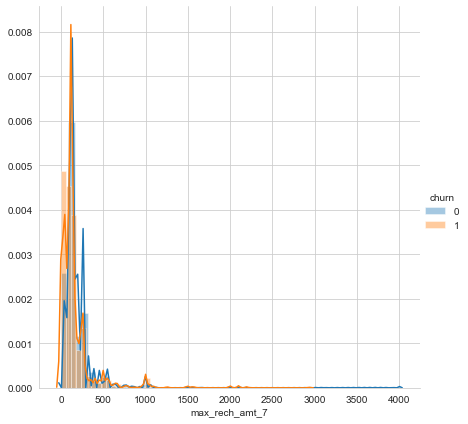

In [68]:
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

In [69]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
166.76719883889695
85.37074969274887
median:
144.0
30.0
Quantiles:
[  0.  67. 144. 198.]
[  0.   0.  30. 130.]


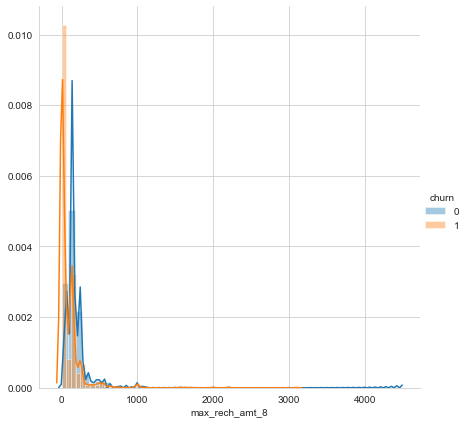

In [70]:
sns.FacetGrid(df4,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

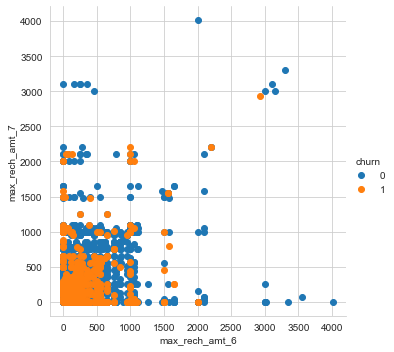

In [71]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

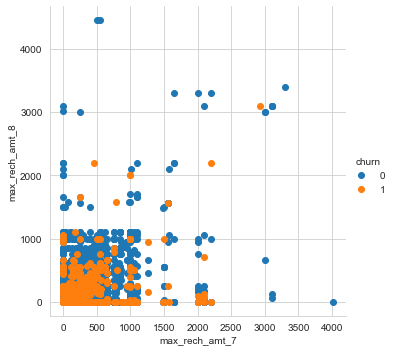

In [72]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

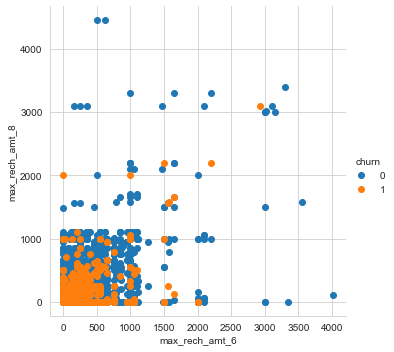

In [73]:
sns.FacetGrid(df4,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

Note: due to space & size we did not include all univariate and bivariate analysis in this file.

### Correlation Matrix: Bivariate Analysis

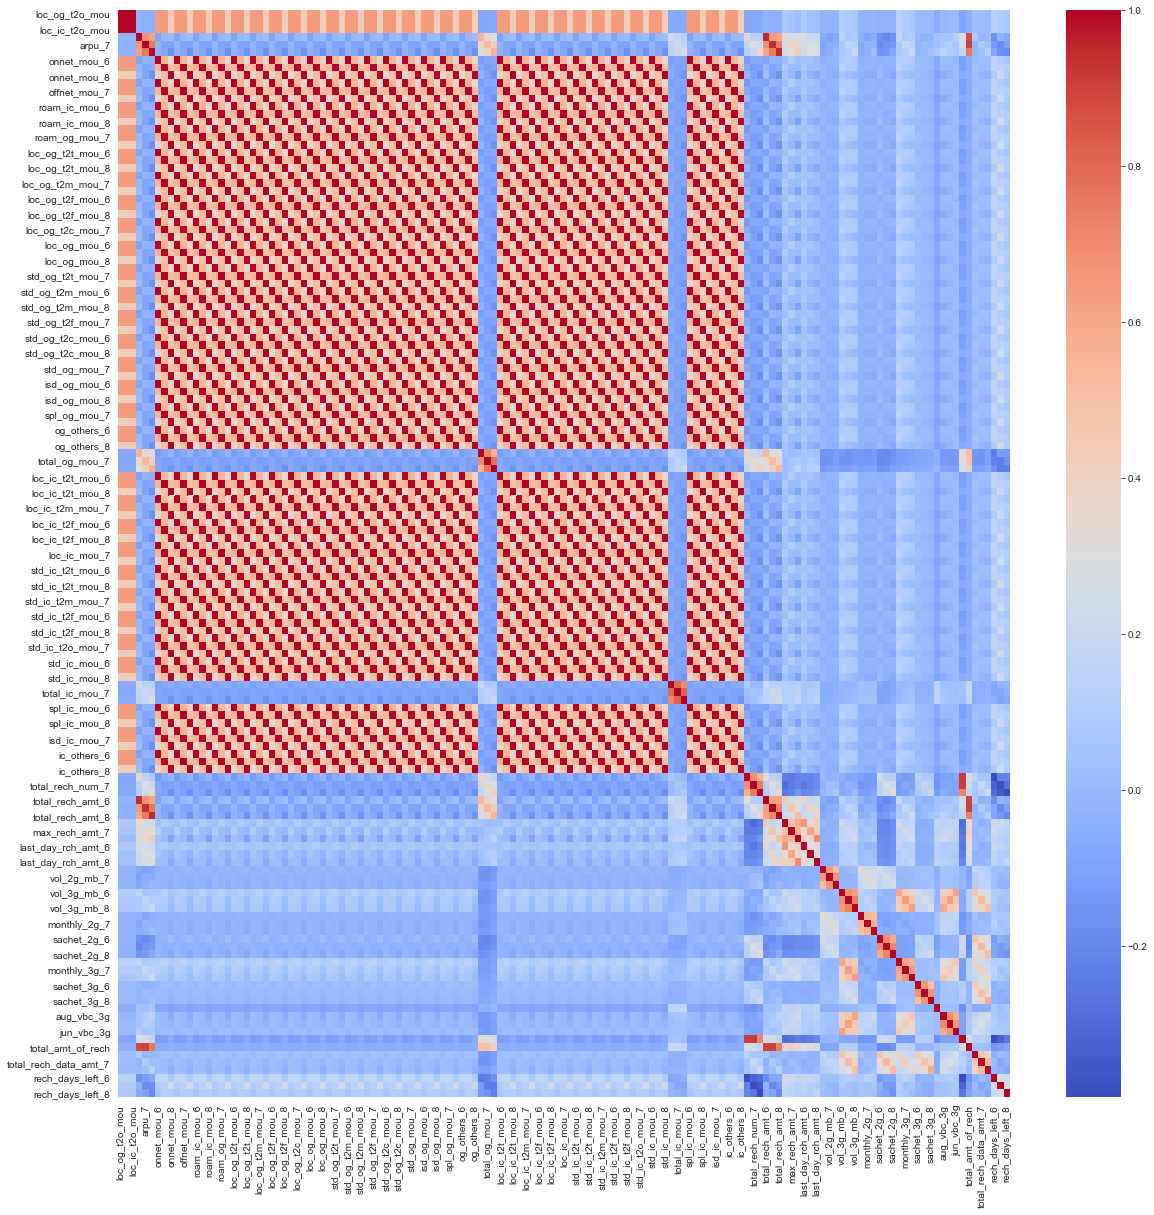

In [74]:
Tel = df4.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(Tel.corr(), cmap="coolwarm")

In [75]:
# Create correlation matrix
corr_matrix = Tel.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:93

['std_og_t2o_mou', 'loc_ic_t2o_mou', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_m

* OBSERVATION: 93 highly correlated features (> 80%) found in the data set.
* NOTE: We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE.

### OBSERVATIONS
1. Data is higly imbalanced only 8.14% data is churn & remaining is non_churn
2. From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
3. There are many highly correlated features, found 93 features with more then 0.8 correlation.

### NEXT STEPS:
1. Need to balance the data, apply suitable data-balancing method
2. Features are highly correlated, use feature reduction methods before modelling.

## PART 3: FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION


In [76]:
# Load clean telecom data file
master_df = df4
master_df.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6  \
0      7000842753            0.00            0.00            0.00  197.38   
7      7000701601            0.00            0.00            0.00 1069.18   
8      7001524846            0.00            0.00            0.00  378.72   
21     7002124215            0.00            0.00            0.00  514.45   
23     7000887461            0.00            0.00            0.00   74.35   

    arpu_7  arpu_8   onnet_mou_6   onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   214.82  213.80 7001204632.00 7001204632.00         0.00 7001204632.00   
7  1349.85 3171.48         57.84         54.68        52.29        453.43   
8   492.22  137.36        413.69        351.03        35.08         94.66   
21  597.75  637.76        102.41        132.11        85.14        757.93   
23  193.90  366.97         48.96         50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  7001204632.00          0.00  7001204632.00  7001204632.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0   7001204632.00  7001204632.00           0.00     7001204632.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0      7001204632.00              0.00     7001204632.00     7001204632.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00     7001204632.00     7001204632.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0      7001204632.00     7001204632.00              0.00 7001204632.00   
7               0.00              0.00              0.00        422.16   
8               0.00              0.00              7.15        378.09   
21              0.00              0.00              0.00         97.04   
23              0.00              0.00             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0  7001204632.00          0.00     7001204632.00     7001204632.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00     7001204632.00     7001204632.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36            808.74            876.

In [77]:
print('Dataframe Shape: ', master_df.shape); print_ln()
print("Dataframe Info: \n"); master_df.info(); print_ln()

Dataframe Shape:  (30001, 143)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 143 entries, mobile_number to rech_days_left_8
dtypes: float64(114), int32(1), int64(28)
memory usage: 32.8 MB
-------------------------------------------------------------------------------- 



In [78]:
# Drop MemberID/Phone-number
df5 = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = df5.drop(['churn'], axis=1)
X = df5.drop(['churn'], axis=1)
y = df5['churn']

In [79]:
X.shape

(30001, 141)

### Data Standardization/Normalization

In [80]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [81]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [82]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (21000, 141)
X_test Dataframe Shape (9001, 141)
Imbalance in Train Data: 0.08875985068436333
Imbalance in Test Data: 0.08812862669245648


### Balance data set by oversampling

In [83]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [84]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38576, 141)
y_tr Dataframe Shape (38576,)
Imbalance in Train Data: 1.0


### Feature reduction using RFE

In [85]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [86]:
rfe_features = list(df_telecom.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features)

Features identified by RFE for model buidling:  ['arpu_7', 'arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'rech_days_left_8']


In [87]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [89]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6941 1331]
 [ 122  607]]


In [90]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8272
           1       0.31      0.83      0.46       729

    accuracy                           0.84      9001
   macro avg       0.65      0.84      0.68      9001
weighted avg       0.93      0.84      0.87      9001



### OBSERVATIONS
1. Getting 84.0% accuracy 
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Key features obtained from RFE: 

['arpu_7', 'arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'rech_days_left_8']

### NEXT STEPS:
1. Will use better models that suits this problem.

## Using Decision Trees

In [92]:
df6 = df5.copy()

In [101]:
# Creating X and y from the High value customer data frame
X = df6.drop(['churn'],axis=1)
y = df6['churn']

In [102]:
# Creating Train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [103]:
#Checking the shpe of the train and test
X_train.shape, X_test.shape

((21000, 141), (9001, 141))

In [104]:
# importing library for Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [105]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8251
           1       0.37      0.80      0.51       750

    accuracy                           0.87      9001
   macro avg       0.67      0.84      0.72      9001
weighted avg       0.93      0.87      0.89      9001



#### Plot the ROC Curve

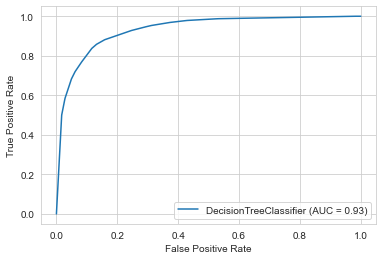

In [107]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [108]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [109]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Churned', "Not Churned"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [110]:
def evaluate_model(dt_classifier):
    
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    conf_mat=confusion_matrix(y_train, dt_classifier.predict(X_train))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    conf_mat=confusion_matrix(y_test, dt_classifier.predict(X_test))
    print(conf_mat)
    TP = conf_mat[1,1] # true positive 
    TN = conf_mat[0,0] # true negatives
    FP = conf_mat[0,1] # false positives
    FN = conf_mat[1,0] # false negatives
    print("Sesnitivity/Recall : ", (TP / float(TP+FN)))
    print("Specificity : ", TN / float(TN+FP))
    print("False Postive Rate : ", FP/ float(TN+FP))
    print("Precision : ", TP / float(TP+FP))

In [111]:
gph = get_dt_graph(dt_base)
Image(gph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
evaluate_model(dt_base)

#### Hyper-parameter tuning for the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [ ]:
params = {
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_best)

In [ ]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [ ]:
plot_roc_curve(dt_best, X_test, y_test)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, random_state=100, oob_score=True,class_weight='balanced')

In [ ]:
%%time
rf_base.fit(X_train, y_train)

In [ ]:
rf_base.oob_score_

In [ ]:
evaluate_model(rf_base)

In [ ]:
plot_roc_curve(rf_base, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42,max_features=12,n_jobs=-1,class_weight='balanced')

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
evaluate_model(rf_best)

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [ ]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

####  Basis the above observations mentioned are the recommendations to Business
1) From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers, specially the usage during the action pahse when compared to good month (7th month) has reduced            

2) The other key factor is if the recharge amount shows a dip in the action phase it signifies a churn of the customer 

3) Age on network is also a key indicator for identifying the churn, if "aon" is less than 500 days and their usage is reduced, it indicates the customer is about to be churned

4) The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior

### Final Analysis :

#### We observe for Decision Tree, the Accuracy is about 88.112, Sensitivity is 76% while AUC is at 81%. Since the the sensitivity is low, the churn data is not reliable       
#### Additionally, by Random Forest the Accuracy is about 94%, Sensitivity is at 61% and AUC is at 94%. Since the the sensitivity is low, the churn data is not reliable.
#### For Logistics Regression, the Accuracy is 84%, Sensitivity is 84% and F1 score is about 91%.

### As the F1 Score is very high coupled with Accuracy being high as well, we conclude that Logistic Regression  Model is the best model to predict churn